## 1 Support Vector Machine

In this notebook, basic introduction and simple application of support vector machine (SVM) will be introduced.

### 1.1 Principle Introduction
Support vector machine is a classic supervised machine learning algorithm. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objective.

#### 1.1.1 Classification using separating hyperplane

At first, please visualize the following dataset using the recommended function $plt.scatter()$.

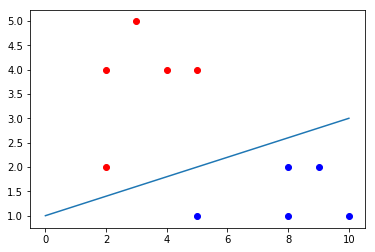

In [2]:
import numpy as np


x = [[2, 2],
     [2, 4],
     [3, 5],
     [4, 4],
     [5, 4],
     [5, 1],
     [8, 1],
     [8, 2],
     [9, 2],
     [10, 1]]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x = np.asarray(x)
y = np.asarray(y)

import matplotlib.pyplot as plt
color = ['r', 'b']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x[:5,0], x[:5,1],c='r')
# please plot the rest of points
ax1.scatter(x[5:,0], x[5:,1],c='b')

# plot a hyperplane in a two-dimensional space
ax1.plot([0,10], [1,3])



In a p-dimensional space, a hyperplane is a ﬂat affine subspace of dimension p-1. Here affine refers to that  the subspace need not pass through the origin. The hyperplane in a two-dimensional space could be defined using following equation.
$$b + w_1 x_1 + w_2 x_2 = 0$$
In p-dimensional space, the following equation could define the hyperplane.
$$b + w_1 x_1 + w_2 x_2 + ... + w_p x_p = 0$$
For example, our dataset has two classes, $y=-1$ and $y=1$, and desicion function is defined as $f(x)=b + w_1 x_{i1} + w_{2} x_{i2} + ... + w_p x_{ip}$.  
If $y_i=1$, $f(x_i) = b + w_1 x_{i1} + w_{2} x_{i2} + ... + w_p x_{ip} > 0$.  
If $y_i=-1$, $f(x_i) = b + w_1 x_{i1} + w_{2} x_{i2} + ... + w_p x_{ip} < 0$.
We could combine both of two above and to get, $$y_i f(x_i) = y_i (b + w_1 x_i1 + w_2 x_i2 + ... + w_p x_ip) > 0 \tag{1}$$

Recalling the logistic regression, the cost function:
$$\min_{\theta} \frac{1}{m} \sum_{i=1}^{m}[y^{(i)} (-log(h_{\theta}(x))) + (1-y^{(i)}) (-log(1-h_{\theta}(x)))]$$

#### 1.1.2 The maximal margin classifier

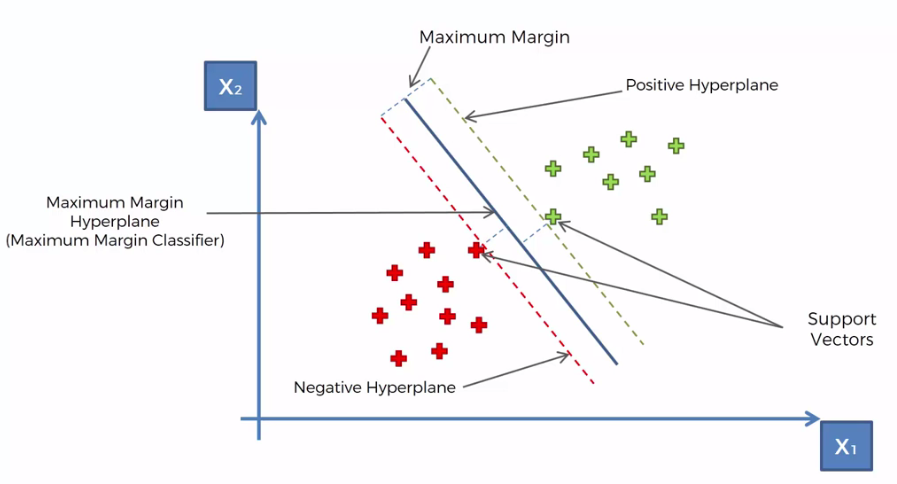

In [3]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/maimal_margin_classifier.png", width=800, height=800)

If the dataset is separable, usually there are countless hyperplanes that could separate the postive and negative data. The question is that how could we choose one as our separating hyperplane. A common and reasonable choice is maximal margin hyperplane, which is farest from training dataset, both negative and positive.  
Assuming that the maximum marging $Margin_{max} = 2 M$, we could have such judging condings to estimate output.
$$b + w_1 X_{i1} + w_2 x_{i2} + ... + w_p x_{ip} > M , \text{if} \ y_i=1$$
$$b + w_1 X_{i1} + w_2 x_{i2} + ... + w_p x_{ip} < -M , \text{if} \ y_i=-1$$
Similarly, combine the above two, we could get
$$y_i (b + w_1 x_{i1} + w_2 x_{i2} + ... + w_p x_{ip}) \geq M $$

We could define maximal margin classifier is the solution to the following optimiyation problem.
$$\max_{b, w_1 ..., w_p} \ M  \tag{2}$$
$$\text{subject to}    \tag{3} y_i (b + w_1 x_{i1} + w_2 x_{i2} + ... + w_p x_{ip}) \geq M$$

Here we want to define the distance between positive hyperplane and negative heyperplane. Pick an arbirary point $\textbf{x}_1$ that lies on the negative hyperplane, then on positive hyperplane we could find the the point $\textbf{x}_2$ that is closest to the point $\textbf{x}_1$. Recall that the vector $\textbf{w}$ is perpendicular to both hyperplanes. Therefore, we could find that,
$$\textbf{x}_2 = \textbf{x}_1 +  \lambda \textbf{w}$$
$\lambda \textbf{w}$ is the vector from $\textbf{x}_1$ to $\textbf{x}_2$, and so $\lambda ||\textbf{w}||$ is the distance between $\textbf{x}_1$ and $\textbf{x}_2$, also the distance between two hyperplanes.
$$\textbf{w}^{T} \textbf{x}_2 + b = M \ \text{where} \ \textbf{x}_2 = \textbf{x}_2 = \textbf{x}_1 +  \lambda \textbf{w}$$
$$ \textbf{w}^{T} (\textbf{x}_1 +  \lambda \textbf{w}) + b = M$$
$$ \textbf{w}^{T} \textbf{x}_1 + b + \lambda \textbf{w}^{T} \textbf{w} = M \ \text{where} \ \textbf{w}^{T} \textbf{x}_1 + b = -M $$
$$\lambda  \textbf{w}^{T} \textbf{w} = 2 M $$
$$\lambda ||\textbf{w}|| = \frac{2}{||\textbf{w}||} $$
Therefore we could use $\min_{w,b} \frac{1}{2} ||\textbf{w}||^2$ to represent (2).

#### 1.1.3 Soft margin classifier

The above margin classifier could also be called hard margin SVM. The hyperplane in that does not allow that any data point is in the wrong side. As a result, the hard maximum margin hyperplane is extremely sensitive to a change in a single observation and it is highly possible to overﬁt the training data. To solve this problem, soft margin classifier has been introduced.

In soft margin classifier, a varible named slack variable would be introduced to modify formula (5).
$$y_i (b + w_1 x_{i1} + w_2 x_{i2} + ... + w_p x_{ip}) \geq M(1-\epsilon_{i}) $$
$$\text{with} \ \epsilon_{i} \geq 0  $$

Thus, there are some tolereance for the outlier and it could avoid the problem like overfitting. The optimum problem could be rewriten as following.
$$\min_{w,b,\epsilon} \frac{1}{2} ||\textbf{w}||^2 + C \sum_{i=1}^{n} \epsilon_i$$

C is a tunable parameter, if C is a very large value, approaching to positive infinite. There are no tolerance for any outliers or wrong classified data point in the training set. If c is approching zero, the algorithm does not care about whether to classify data set correctly and the maximum margin is the onlz objective.

#### 1.1.4 Kernal Function

If dataset is linearly separable, we could use the linear hyperplane to classify it. When the dataset is complicated linearly inseparabel, keranl function would be introduced to solve the non-linear classification problem. On the one hand, kernel function could be used to map the input data to a new high-dimensional space, which is linearly separabel. On the other hand, input data could be transformed to a new feature space and in the new feature space, it is easier to define a similarity function to do the pattern recognition. In this section, several commen kernel functions would be introduced.

(1) Polynomial kernel

$$K(x, x') = (x \cdot x' + 1)^p$$

(2) Gaussian Radial Basis Function

$$K(x, x') = exp (- \frac{||x-x'||^2}{2\sigma^2})$$

(3) Exponential Radial Basis Function

$$K(x,x') =  exp (- \frac{||x-x'||}{2\sigma^2}) $$

(4) Multi-Layer Perceptron

$$K(x, x') = tanh(\rho(x \cdot x')+ \varrho)$$

### 1.2 Application

#### 1.2.1 Dataset Introduction

Here we use the same dataset, Titanic, as we used in Logistic regression. The dataset includes data samples of personal information of passengers on Titanic. The task here is to predit that passengers got survived or not.

In [4]:
import pandas as pd

# read the dataset from csv file
train_set = pd.read_csv('D:/Jupyter_space/titanic/train.csv')
test_set = pd.read_csv('D:/Jupyter_space/titanic/test.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We could find that most of missing values are in columns 'Age', 'Cabin'.

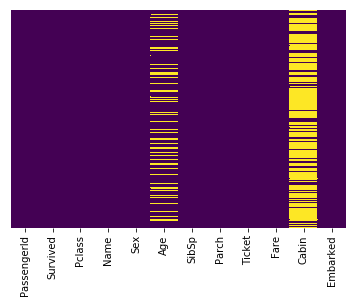

In [5]:
# plot a heatmap to show the distribution of missing values
import seaborn as sns
sns.heatmap(train_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### 1.2.2 Dataset Preproposing

The following function can be used to fill missing values in the column 'Age' according to the information from column 'Pclass'.

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    # fill missing value accroding to pclass
    if pd.isnull(Age):
        # the average age of passengers in 1st class is 37
        if Pclass == 1:
            return 37       
        # the average age of passengers in 1st class is 29
        elif Pclass == 2:
            return 29
        # the average age of passengers in other class is 24
        else:
            return 24
    else:
        return Age

# use above function to fill the data in column 'Age'
train_set['Age'] = train_set[['Age','Pclass']].apply(impute_age,axis=1)

The below block is responsible for fill missing values in the coulumn 'cabin' and then map the 'cabin' informarion into four categories, high, medium, low and missing.

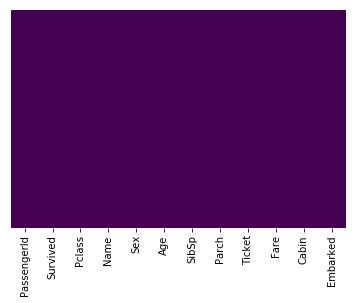

In [7]:
# use 'z' to fill missing value in the column 'Cabin'
train_set['Cabin'] = train_set['Cabin'].fillna('Z')
# extract the first character of 'cabin'
train_set['Cabin'] = train_set['Cabin'].apply(lambda x: str(x)[0])

# classify the cabin using the following four levels
train_set['Cabin'] = train_set['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
train_set['Cabin'] = train_set['Cabin'].replace(['F', 'C'], 'M')        #Medium
train_set['Cabin'] = train_set['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
train_set['Cabin'] = train_set['Cabin'].replace(['Z'],'X')              #Missing

# plot heatmap to check the distribution of missing values
sns.heatmap(train_set.isnull(), yticklabels=False,cbar=False,cmap='viridis')

The data type of category data will be transfered to integer.

In [8]:
# map 'sex' into int type data
train_set['Sex'] = train_set['Sex'].map({'male': 0, 'female': 1}).astype(int)

# fill missing value to 'embarked' and map it into int data
train_set['Embarked'] = train_set['Embarked'].fillna('X')
train_set['Embarked'] = train_set['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2, 'X':4} ).astype(int)

# map 'cabin' into int type data
train_set['Cabin'] = train_set['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})

Extract title information from column 'Name'.

In [9]:
def Titles(data):
    # extract the first string from name
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    # map the title into integers
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    return data

train_set = Titles(train_set)

# drop the coped and useless columns
train_set = train_set.drop(['Name', 'Title','PassengerId'],axis = 1)
print(train_set.shape)

(891, 11)


In [10]:
def Tickets(data):
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    return data
train_set = Tickets(train_set)
train_set = train_set.drop(['Ticket', 'TicketLength'],axis = 1)

The data in column 'Fare' will be classified using four levels.

In [11]:
def fare_distribution(data):
    # classify the column 'fare' and map into integers
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    data['FareGroup'] = data['FareGroup'].astype(int)
    return data

train_set = fare_distribution(train_set)
train_set = train_set.drop(['Fare'],axis = 1)

In [12]:
def age_distribution(data):
    # classify the column 'age' and map into integers
    data.loc[data['Age']].round()
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    return data
train_set = age_distribution(train_set)
train_set = train_set.drop(['Age'],axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
train_set.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,TitleGroup,SharedTicketCount,FareGroup,AgeGroup
0,0,3,0,1,0,3,0,2,1,1,2.0
1,1,1,1,1,0,1,1,1,1,3,2.0
2,1,3,1,0,0,3,0,1,1,1,2.0
3,1,1,1,1,0,1,0,1,2,3,2.0
4,0,3,0,0,0,3,0,2,1,1,2.0


#### 1.2.3 Build up and Train the Model

In [14]:
from sklearn.model_selection import train_test_split
# split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(train_set.drop('Survived',axis=1), 
           train_set['Survived'], test_size=0.2, random_state=5)
X_train.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,TitleGroup,SharedTicketCount,FareGroup,AgeGroup
887,1,1,0,0,0,0,1,1,3,2.0
416,2,1,1,1,3,0,1,1,3,2.0
479,3,1,0,1,3,0,1,1,1,1.0
134,2,0,0,0,3,0,2,1,1,2.0
588,3,0,0,0,3,0,2,1,1,2.0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, fbeta_score

# initialize svm and logistic regression classifier
clf_svc = SVC(kernel='rbf')
clf_lr = LogisticRegression()

# use training set to train the model
clf_svc.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

# predict on testing set
svc_predictions = clf_svc.predict(X_test)
lr_predictions = clf_lr.predict(X_test)


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

print(confusion_matrix(y_test, svc_predictions))
print(confusion_matrix(y_test, lr_predictions))

acc_SVM = cross_val_score(clf_svc,X_test,y_test)
acc_lr =cross_val_score(clf_lr,X_test,y_test)

print(accuracy_score(y_test, svc_predictions))
print(accuracy_score(y_test, lr_predictions))

# clf_svm = SVC()
# parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
#                   'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}
# grid = GridSearchCV(estimator = clf_svm, param_grid = parameters_svm, cv = 10, scoring = 'accuracy')
# grid.fit(X_train, y_train)
# print(grid.best_score_)
# print(grid.best_estimator_.get_params())

[[102   9]
 [ 15  53]]
[[101  10]
 [ 16  52]]
0.8659217877094972
0.8547486033519553


C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to accoun

In [16]:
from sklearn.decomposition import PCA

# reduce the dimension data into two-dimension
X_train_reduced = PCA(n_components=2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=2).fit_transform(X_test)

274
(712,)


C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Support Vector Machines')

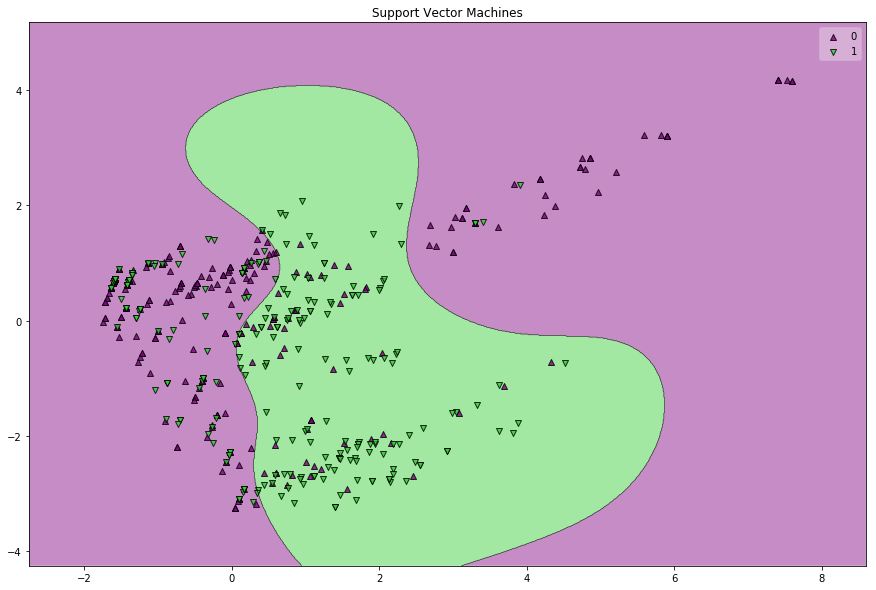

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import mlxtend
from mlxtend.plotting import plot_decision_regions

t = np.array(y_train)
t = t.astype(np.integer)

print(np.sum(t))
print(t.shape)

# initialize the classifier
clf_svm = SVC(kernel='rbf')
# use the two-dimensional data to train the model
clf_svm.fit(X_train_reduced,y_train)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',markers = ['^','v'])
plt.title('Support Vector Machines')

## 2 Dicision Tree
In this part, we shall introduce another classifier algorithm, decision tree. At first, some mathematic aspects will be shown to let you understand how does decision tree work. Then, we will use a dataset to show you how could we use classifier pratically.

### 2.1 Principles Introduction
Simply speaking, decision tree classifier repetitively divides the working area in to sub-plot by identifying lines. Taking the following image as an example, we need at least two lines to to classify different points. This figure is intuitive and easy to find the boudry lines, however when the data has higher dimensions and we could not visualise it, how sould we find these lines? In the following, we shall introduce several mathematic items to explain this problem.

* Entropy  
Entropy is a measure of the randomness in the information being processed. The higher the entropy, the more information it includes, the harder it is to draw any conclusions from that information.
$$H(x) = - \sum p(x) log(x)$$
$x$ is the event or possiple division of the current state and $p(x)$ is the probability of $x$.   
<br>
* Information Gain  
Information gain can be defined as the amount of information gained about a random variable or signal from observing another random variable.It can be considered as the difference between the entropy of parent node and weighted average entropy of child nodes. 
$$IG(S, A) = H(s) - \sum_{x \in A} p(x) H(x)$$ 

* Gini Impurity  
Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. 
$$Gini(x) = 1 - \sum p_{i}^{2}$$

Decision tree is a structure to classify the data and there are many algorithms to build up such a sturcture. Here we introduce two classific algorithms, ID3 and CART. 
* ID3 (Iterative Dichotomiser 3) — This uses entropy and information gain as metric.
* CART (Classification and Regression Trees) — This makes use of Gini impurity as metric.  

Then we shall use such a example to illustrate the proccess of these two algorithms.

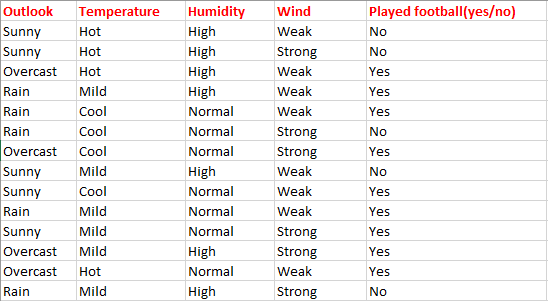

In [2]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/Decision_tree_table.png", width=800, height=800)

In this dataset, it includes weather information and whether to play football. Our task is to predict if it is a good day to play football according to weather.

#### ID3 (Iterative Dichotomiser 3)

There are 14 pieces of inforamtion, including 9 yes and 5 no. The entrophy of this dataset could be calculated as following:
$$H(x) = \sum p(x) log(x) = - \frac{9}{14} log(\frac{9}{14}) - \frac{5}{14} log(\frac{5}{14}) = 0.94$$
if we chooce outlook as next node to make a decision, we could get such a table.

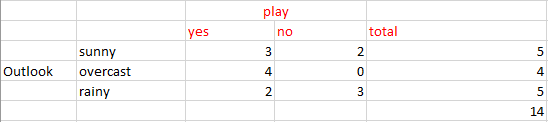

In [3]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/Decision_tree_table2.png", width=800, height=800)

The information gain based on Outlook could be calculated,
$$GI(s, Outlook) = H(s) - \sum_{x \in Outlook}p(x)H(x)$$ 
$$H(s) = - \frac{9}{14} log(\frac{9}{14}) - \frac{5}{14} log(\frac{5}{14}) = 0.94$$ 
$$ \sum_{x \in Outlook}p(x)H(x) = - \frac{5}{14}[- \frac{3}{5} log(\frac{3}{5}) - \frac{2}{5} log(\frac{2}{5})] - \frac{4}{14} \times 0 - \frac{5}{14}[- \frac{2}{5} log(\frac{2}{5}) - \frac{3}{5} log(\frac{3}{5})] = 0.693$$ 
$$GI(s, Outlook) = 0.94 - 0.693 = 0.247$$ 
Similarly, imforamtion gain based on other features, such as temperature, humidty, and wind, could also be calculated.  
$$GI(s, Temperature) = 0.94 - 0.911 = 0.029$$ 
$$GI(s, Humidty) = 0.94 - 0.788 = 0.152$$ 
$$GI(s, Wind) = 0.94 - 0.892 = 0.0468$$ 
It is not difficult to find that $GI(s, Outlook)$ is the biggest, so we choose Outlook as next node to make the dicision.

#### CART (Classification and Regreesion Tree)

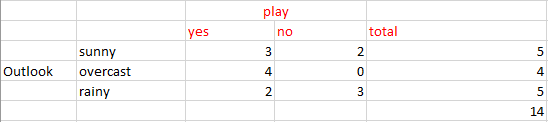

In [4]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/Decision_tree_table2.png", width=800, height=800)

Firstly, in order to simplify the calcuating process, we difine a Gini function as following: 
$$gini(a,b) = 1 - (\frac{a}{a+b})^2 - (\frac{b}{a+b})^2$$
The Gini impurity of the root node of the decision tree could be calculated:
$$Gini(S) = gini(9, 5) = 1 - [(9/14)^2 + (5/14)^2] = 0.4591$$
$$Gini(S, outlook) = (5/14)gini(3,2) + (4/14)gini(4,0)+ (5/14)gini(2,3) $$
$$ = (5/14)(1 - (3/5)² - (2/5)²) + (4/14)*0 + (5/14)(1 - (2/5)² - (3/5)²) $$
$$ = 0.171+0+0.171 = 0.342$$
The Gini gain could be calculated.
$$Gini \ gain (S, outlook) = 0.459 - 0.342 = 0.117$$
$$Gini \ gain(S, Temperature) = 0.459 - 0.4405 = 0.0185$$
$$Gini \ gain(S, Humidity) = 0.459 - 0.3674 = 0.0916$$
$$Gini \ gain(S, windy) = 0.459 - 0.4286 = 0.0304$$
The gini gain of outlook is also the biggest, so we choose the outlook as the next node to make the dicision.

### 2.2 Applications of Decision Tree

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, fbeta_score

# initialize svm and logistic regression classifier
clf_RF = RandomForestClassifier(n_estimators=10)

# use training set to train the model
clf_RF.fit(X_train, y_train)

# predict on testing set
RF_predictions = clf_RF.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

print(confusion_matrix(y_test, RF_predictions))

acc_SVM = cross_val_score(clf_RF,X_test,y_test)

print(accuracy_score(y_test, RF_predictions))

[[98 13]
 [19 49]]
0.8212290502793296


C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
